In [1]:
%run -i ch03.py

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X, y = shuffled
X.shape, y.shape

((60000, 784), (60000,))

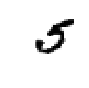

In [3]:
visualize_mnist(train, 36000)

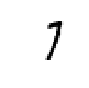

In [4]:
visualize_mnist(shuffled, 36000)

In [5]:
y[36000]

7

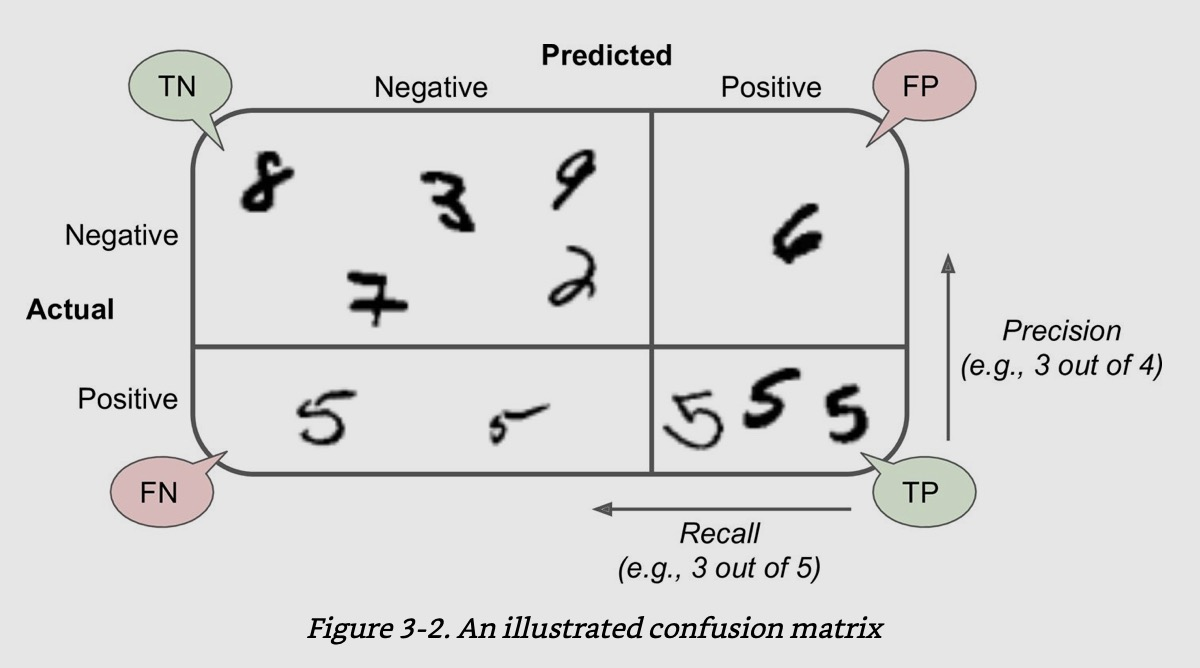

In [6]:
from IPython.display import Image
from const import PATH_SCREENSHOTS
Image(f'{PATH_SCREENSHOTS}/ch03/confusion.jpg', width=500)

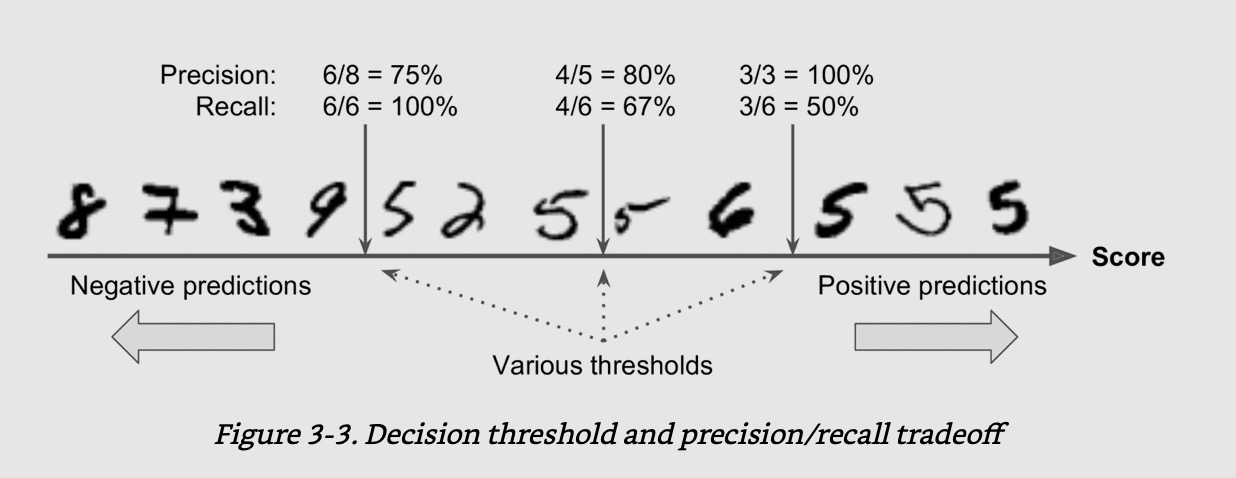

In [7]:
Image(f'{PATH_SCREENSHOTS}/ch03/thresholds.jpg', width=500)

In [8]:
features = X
labels = (y_ == 5)

from sklearn.linear_model import SGDClassifier

from const import METHOD_DECISION_FUNCTION
from models import ClassifierModel as CM

sgd = CM(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
sgd.evaluate(features, labels, cv=3, method=METHOD_DECISION_FUNCTION)
print(sgd)
print(repr(sgd))

Generic model with algorithm: SGDClassifier
<models.ClassifierModel object at 0x11a4dc5f8>: SGDClassifier,
size: 60000.00, auc: 0.82, sensitivity: 0.66, specificity: 0.98, precision: 0.80


In [9]:
def prc_graph(p, r, t, show=True):
    if show:
        plt.figure(figsize=(8, 4))
    plt.plot(t, p, 'b--', label="Precision")
    plt.plot(t, r, 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.xlim([-700000, 700000])
    if show:
        plt.show()
    
def pr_graph(p, r, show=True):
    if show:
        plt.figure(figsize=(8, 4))
    plt.plot(r, p, 'b-', label="Precision")
    plt.xlabel("Recall")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    if show:
        plt.show()
    
def roc_graph(fpr, tpr, label=None, show=True):
    if show:
        plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    if show:
        plt.show()

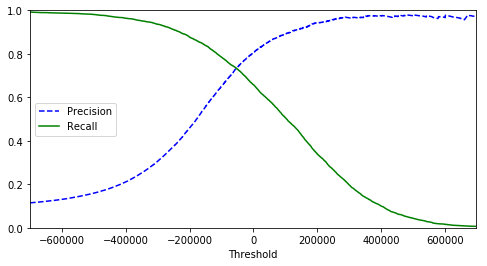

In [10]:
p, r, th = sgd.pc_curve()

prc_graph(p[:-1], r[:-1], th)

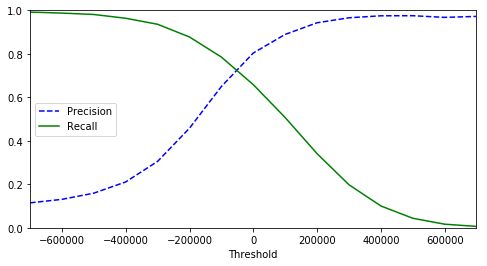

In [11]:
from sklearn.metrics import precision_score, recall_score

ths = [100000 * (x - 7) for x in range(15)]

ps = []
rs = []
zs = []
for th in ths:
    z = (sgd.scores > th)
    ps.append(precision_score(labels, z))
    rs.append(recall_score(labels, z))
    zs.append(z[z==True].shape[0])

prc_graph(ps, rs, ths)

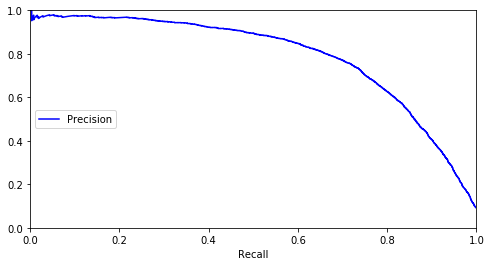

In [12]:
pr_graph(p, r)

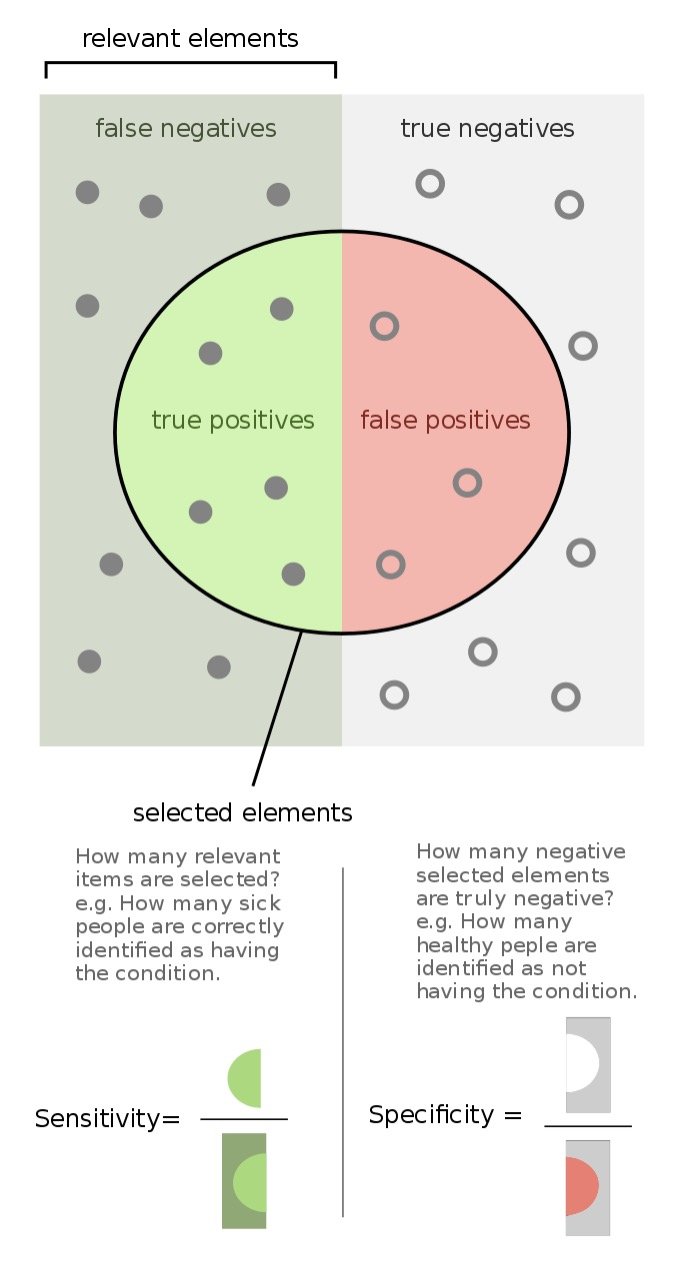

In [13]:
Image(f'{PATH_SCREENSHOTS}/ch03/specificity.jpg', width=300)

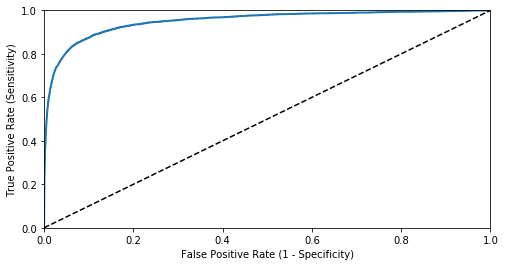

In [14]:
fpr, tpr, th = sgd.roc_curve()
roc_graph(fpr, tpr)

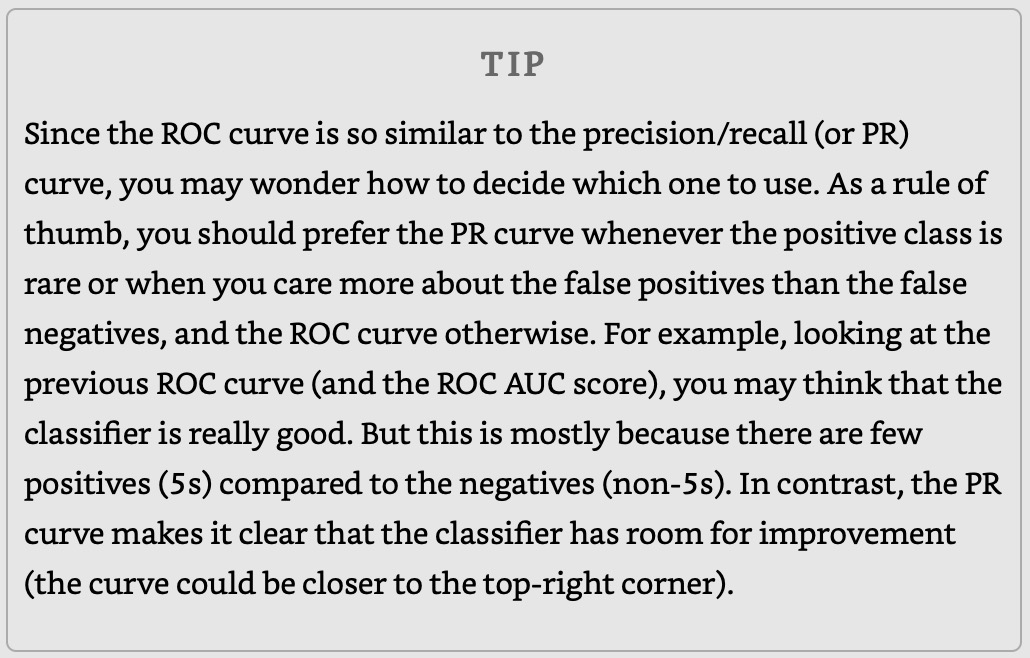

In [15]:
Image(f'{PATH_SCREENSHOTS}/ch03/pr_roc.jpg', width=500)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from const import METHOD_PREDICT_PROBA

rf = CM(RandomForestClassifier, n_estimators=10, random_state=42)
rf.evaluate(features, labels, cv=3, method=METHOD_PREDICT_PROBA)

In [17]:
print(sgd)
print(repr(sgd))
print('-------')
print(rf)
print(repr(rf))

Generic model with algorithm: SGDClassifier
<models.ClassifierModel object at 0x11a4dc5f8>: SGDClassifier,
size: 60000.00, auc: 0.82, sensitivity: 0.66, specificity: 0.98, precision: 0.80
-------
Generic model with algorithm: RandomForestClassifier
<models.ClassifierModel object at 0x119fd8320>: RandomForestClassifier,
size: 60000.00, auc: 0.91, sensitivity: 0.82, specificity: 1.00, precision: 0.98


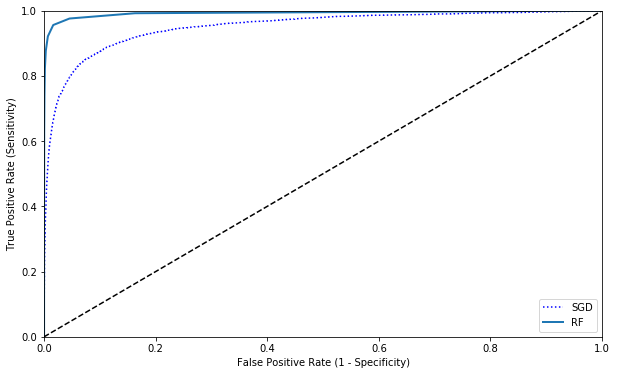

In [18]:
fprf, tprf, thf = rf.roc_curve()

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, 'b:', label="SGD")
roc_graph(fprf, tprf, label="RF", show=False)
plt.legend(loc='lower right')
plt.show()

In [19]:
print(rf.model.classes_)

i = np.argwhere(labels==True)[0][0]
j = np.argwhere(labels==False)[0][0]

print(i, j)

print(labels[i])
print(sgd.model.decision_function([features[i]]))
print(rf.model.predict_proba([features[i]]))
print(labels[j])
print(sgd.model.decision_function([features[j]]))
print(rf.model.predict_proba([features[j]]))

[False  True]
6 0
True
[42948.70933621]
[[0.2 0.8]]
False
[-310317.24835798]
[[0.9 0.1]]


In [20]:
# in the multiclass case, with algorithms that use decision_function,
# sklearn will actually run ovr under the hood (ovo in the case of svm based classifiers)

sgdm = CM(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
sgdm.evaluate(features, y, cv=3, method=METHOD_DECISION_FUNCTION)

In [21]:
# in the multiclass case, with algorithms that use predict_proba,
# sklearn does not need to run ovo or ovr under the hood

rfm = CM(RandomForestClassifier, n_estimators=10, random_state=42)
rfm.evaluate(features, y, cv=3, method=METHOD_PREDICT_PROBA)

In [22]:
print(rfm.model.classes_)

i = np.argwhere(y==5)[0][0]
j = np.argwhere(y!=5)[0][0]

print(i, j)

print(y[i])
print(sgdm.model.decision_function([features[i]]))
print(rfm.model.predict_proba([features[i]]))
print(y[j])
print(sgdm.model.decision_function([features[j]]))
print(rfm.model.predict_proba([features[j]]))

[0 1 2 3 4 5 6 7 8 9]
6 0
5
[[-128029.40901844 -558020.14967735 -891464.35730239 -216918.679914
  -820378.13657841   42948.70933621 -484033.63790861 -431183.18063378
  -265738.41591351 -647031.4192354 ]]
[[0.  0.  0.  0.  0.  0.9 0.1 0.  0.  0. ]]
9
[[-759400.50991909 -525551.53682481 -872643.69676863 -399943.93913413
    46231.15448232 -310317.24835798 -434001.04643821 -307890.81089169
  -364431.76705422   45018.55435251]]
[[0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.7]]


In [23]:
print('SGD', sgd.cv_score())
print('RF', rf.cv_score())
print('SGDM', sgdm.cv_score())
print('RFM', rfm.cv_score())

SGD [0.9456  0.95575 0.9625 ]
RF [0.98275 0.98285 0.9823 ]
SGDM [0.8569786  0.84859243 0.86337951]
RFM [0.94061188 0.93964698 0.93904086]


In [24]:
# if we use scaling, algorithms that user decision_function will benefit more strongly

import pandas as pd
from pipelines import NumericPipeline, PIPELINE_NUMERIC

array = features.astype(np.float64)
frame = pd.DataFrame(data=array)

pipeline = NumericPipeline(frame)

array = pipeline.fit_transform(frame)

sgdm.evaluate(array, y, cv=3, method=METHOD_DECISION_FUNCTION)
rfm.evaluate(array, y, cv=3, method=METHOD_PREDICT_PROBA)

print(y[i])
print(sgdm.model.decision_function([array[i]]))
print(rfm.model.predict_proba([array[i]]))
print(y[j])
print(sgdm.model.decision_function([array[j]]))
print(rfm.model.predict_proba([array[j]]))

print('SGDM', sgdm.cv_score())
print('RFM', rfm.cv_score())

5
[[ -155.73023562 -2254.6896373  -2055.26495805  -945.66594095
  -2450.9199422    -76.88710946  -878.72590753 -1899.61296979
  -1141.32788037 -2243.91975744]]
[[0.  0.  0.  0.  0.  0.9 0.1 0.  0.  0. ]]
9
[[-1405.65153028 -2098.27715215 -2546.15654908 -1457.55708208
    210.06495875 -1000.52151655 -1080.76696172  -577.68014726
   -635.09564438    79.28165203]]
[[0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.7]]
SGDM [0.90766847 0.91294565 0.90928639]
RFM [0.94056189 0.93954698 0.93904086]


In [25]:
# remember - rows are actual classes, columns are predictions

sgdm.matrix

array([[5730,    2,   17,   12,   11,   53,   47,    8,   37,    6],
       [   1, 6465,   46,   21,    6,   40,    8,    9,  132,   14],
       [  57,   36, 5334,  102,   86,   24,   84,   61,  158,   16],
       [  55,   42,  132, 5330,    3,  248,   32,   57,  130,  102],
       [  19,   27,   35,    7, 5372,    8,   50,   26,   81,  217],
       [  58,   43,   30,  180,   72, 4632,  109,   27,  158,  112],
       [  34,   19,   48,    2,   46,   88, 5628,    8,   45,    0],
       [  26,   18,   66,   22,   50,    9,    4, 5810,   18,  242],
       [  50,  149,   77,  151,   16,  165,   57,   24, 5000,  162],
       [  46,   28,   23,   80,  153,   36,    2,  207,   77, 5297]])

In [26]:
matrix = sgdm.matrix / sgdm.matrix.sum(axis=1, keepdims=True)
fmt = lambda x: f'{x:.4f}'
np.array2string(matrix, formatter={'float_kind': fmt}).split('\n')

['[[0.9674 0.0003 0.0029 0.0020 0.0019 0.0089 0.0079 0.0014 0.0062 0.0010]',
 ' [0.0001 0.9589 0.0068 0.0031 0.0009 0.0059 0.0012 0.0013 0.0196 0.0021]',
 ' [0.0096 0.0060 0.8953 0.0171 0.0144 0.0040 0.0141 0.0102 0.0265 0.0027]',
 ' [0.0090 0.0069 0.0215 0.8694 0.0005 0.0405 0.0052 0.0093 0.0212 0.0166]',
 ' [0.0033 0.0046 0.0060 0.0012 0.9195 0.0014 0.0086 0.0045 0.0139 0.0371]',
 ' [0.0107 0.0079 0.0055 0.0332 0.0133 0.8545 0.0201 0.0050 0.0291 0.0207]',
 ' [0.0057 0.0032 0.0081 0.0003 0.0078 0.0149 0.9510 0.0014 0.0076 0.0000]',
 ' [0.0042 0.0029 0.0105 0.0035 0.0080 0.0014 0.0006 0.9274 0.0029 0.0386]',
 ' [0.0085 0.0255 0.0132 0.0258 0.0027 0.0282 0.0097 0.0041 0.8546 0.0277]',
 ' [0.0077 0.0047 0.0039 0.0134 0.0257 0.0061 0.0003 0.0348 0.0129 0.8904]]']

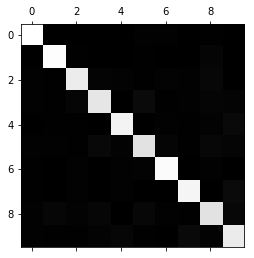

In [27]:
plt.matshow(matrix, cmap=plt.cm.gray)
plt.show()

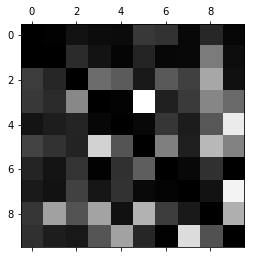

In [28]:
np.fill_diagonal(matrix, 0)
plt.matshow(matrix, cmap=plt.cm.gray)
plt.show()

NameError: name 'mpl' is not defined

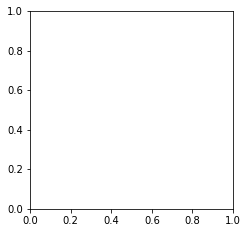

In [29]:
x33 = features[(y == 3) & (sgdm.predictions == 3)][:25]
x35 = features[(y == 3) & (sgdm.predictions == 5)][:25]
x53 = features[(y == 5) & (sgdm.predictions == 3)][:25]
x55 = features[(y == 5) & (sgdm.predictions == 5)][:25]

plt.figure(figsize=(8, 8))

plt.subplot(221)
visualize_mnist_multi(x33, images_per_row=5)
plt.subplot(222)
visualize_mnist_multi(x35, images_per_row=5)
plt.subplot(223)
visualize_mnist_multi(x53, images_per_row=5)
plt.subplot(224)
visualize_mnist_multi(x55, images_per_row=5)

plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

y_large = (y >= 7)
y_odd = (y % 2 == 1)
y_multi = np.c_[y_large, y_odd]

knn = CM(KNeighborsClassifier)
knn.model.fit(features, y_multi)


array([[False,  True]])

In [37]:
for k in range(25):
    print(y[k], y_multi[k], knn.model.predict([array[k]]))

9 [ True  True] [[False  True]]
9 [ True  True] [[False  True]]
4 [False False] [[False  True]]
8 [ True False] [[False  True]]
8 [ True False] [[False  True]]
7 [ True  True] [[False  True]]
5 [False  True] [[False  True]]
9 [ True  True] [[False  True]]
4 [False False] [[False  True]]
4 [False False] [[False  True]]
6 [False False] [[False  True]]
9 [ True  True] [[False  True]]
1 [False  True] [[False  True]]
9 [ True  True] [[False  True]]
7 [ True  True] [[False  True]]
3 [False  True] [[False  True]]
2 [False False] [[False  True]]
6 [False False] [[False  True]]
4 [False False] [[False  True]]
1 [False  True] [[False  True]]
2 [False False] [[False  True]]
1 [False  True] [[False  True]]
3 [False  True] [[False  True]]
3 [False  True] [[False  True]]
0 [False False] [[False  True]]
